In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv("Obesity_Dataset.csv")
df.head()

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption,Vegetable_Consumption,Main_Meals,Snack_Consumption,Smoker,Water_Intake,Calorie_Monitoring,Physical_Activity,Tech_Time,Alcohol_Consumption,Transportation_Mean,Obesity_Level
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2111 non-null   object 
 1   Age                        2111 non-null   int64  
 2   Height                     2111 non-null   float64
 3   Weight                     2111 non-null   float64
 4   Overweight_Family_History  2111 non-null   object 
 5   High_Calorie_Consumption   2111 non-null   object 
 6   Vegetable_Consumption      2111 non-null   float64
 7   Main_Meals                 2111 non-null   float64
 8   Snack_Consumption          2111 non-null   object 
 9   Smoker                     2111 non-null   object 
 10  Water_Intake               2111 non-null   float64
 11  Calorie_Monitoring         2111 non-null   object 
 12  Physical_Activity          2111 non-null   float64
 13  Tech_Time                  2111 non-null   float

In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
numerical_columns = df.select_dtypes(include=["number"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns, categorical_columns

(Index(['Age', 'Height', 'Weight', 'Vegetable_Consumption', 'Main_Meals',
        'Water_Intake', 'Physical_Activity', 'Tech_Time'],
       dtype='object'),
 Index(['Gender', 'Overweight_Family_History', 'High_Calorie_Consumption',
        'Snack_Consumption', 'Smoker', 'Calorie_Monitoring',
        'Alcohol_Consumption', 'Transportation_Mean', 'Obesity_Level'],
       dtype='object'))

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.356493,6.379977,14.00,20.000,23.000,26.000,61.00
Height,2087.0,1.702616,0.093251,1.45,1.630,1.700,1.770,1.98
Weight,2087.0,86.858706,26.190838,39.00,66.000,83.100,108.015,173.00
Vegetable_Consumption,2087.0,2.421409,0.534807,1.00,2.000,2.400,3.000,3.00
Main_Meals,2087.0,2.701203,0.764655,1.00,2.700,3.000,3.000,4.00
Water_Intake,2087.0,2.004792,0.608281,1.00,1.590,2.000,2.465,3.00
Physical_Activity,2087.0,1.012827,0.853496,0.00,0.125,1.000,1.680,3.00
Tech_Time,2087.0,0.663031,0.608152,0.00,0.000,0.631,1.000,2.00


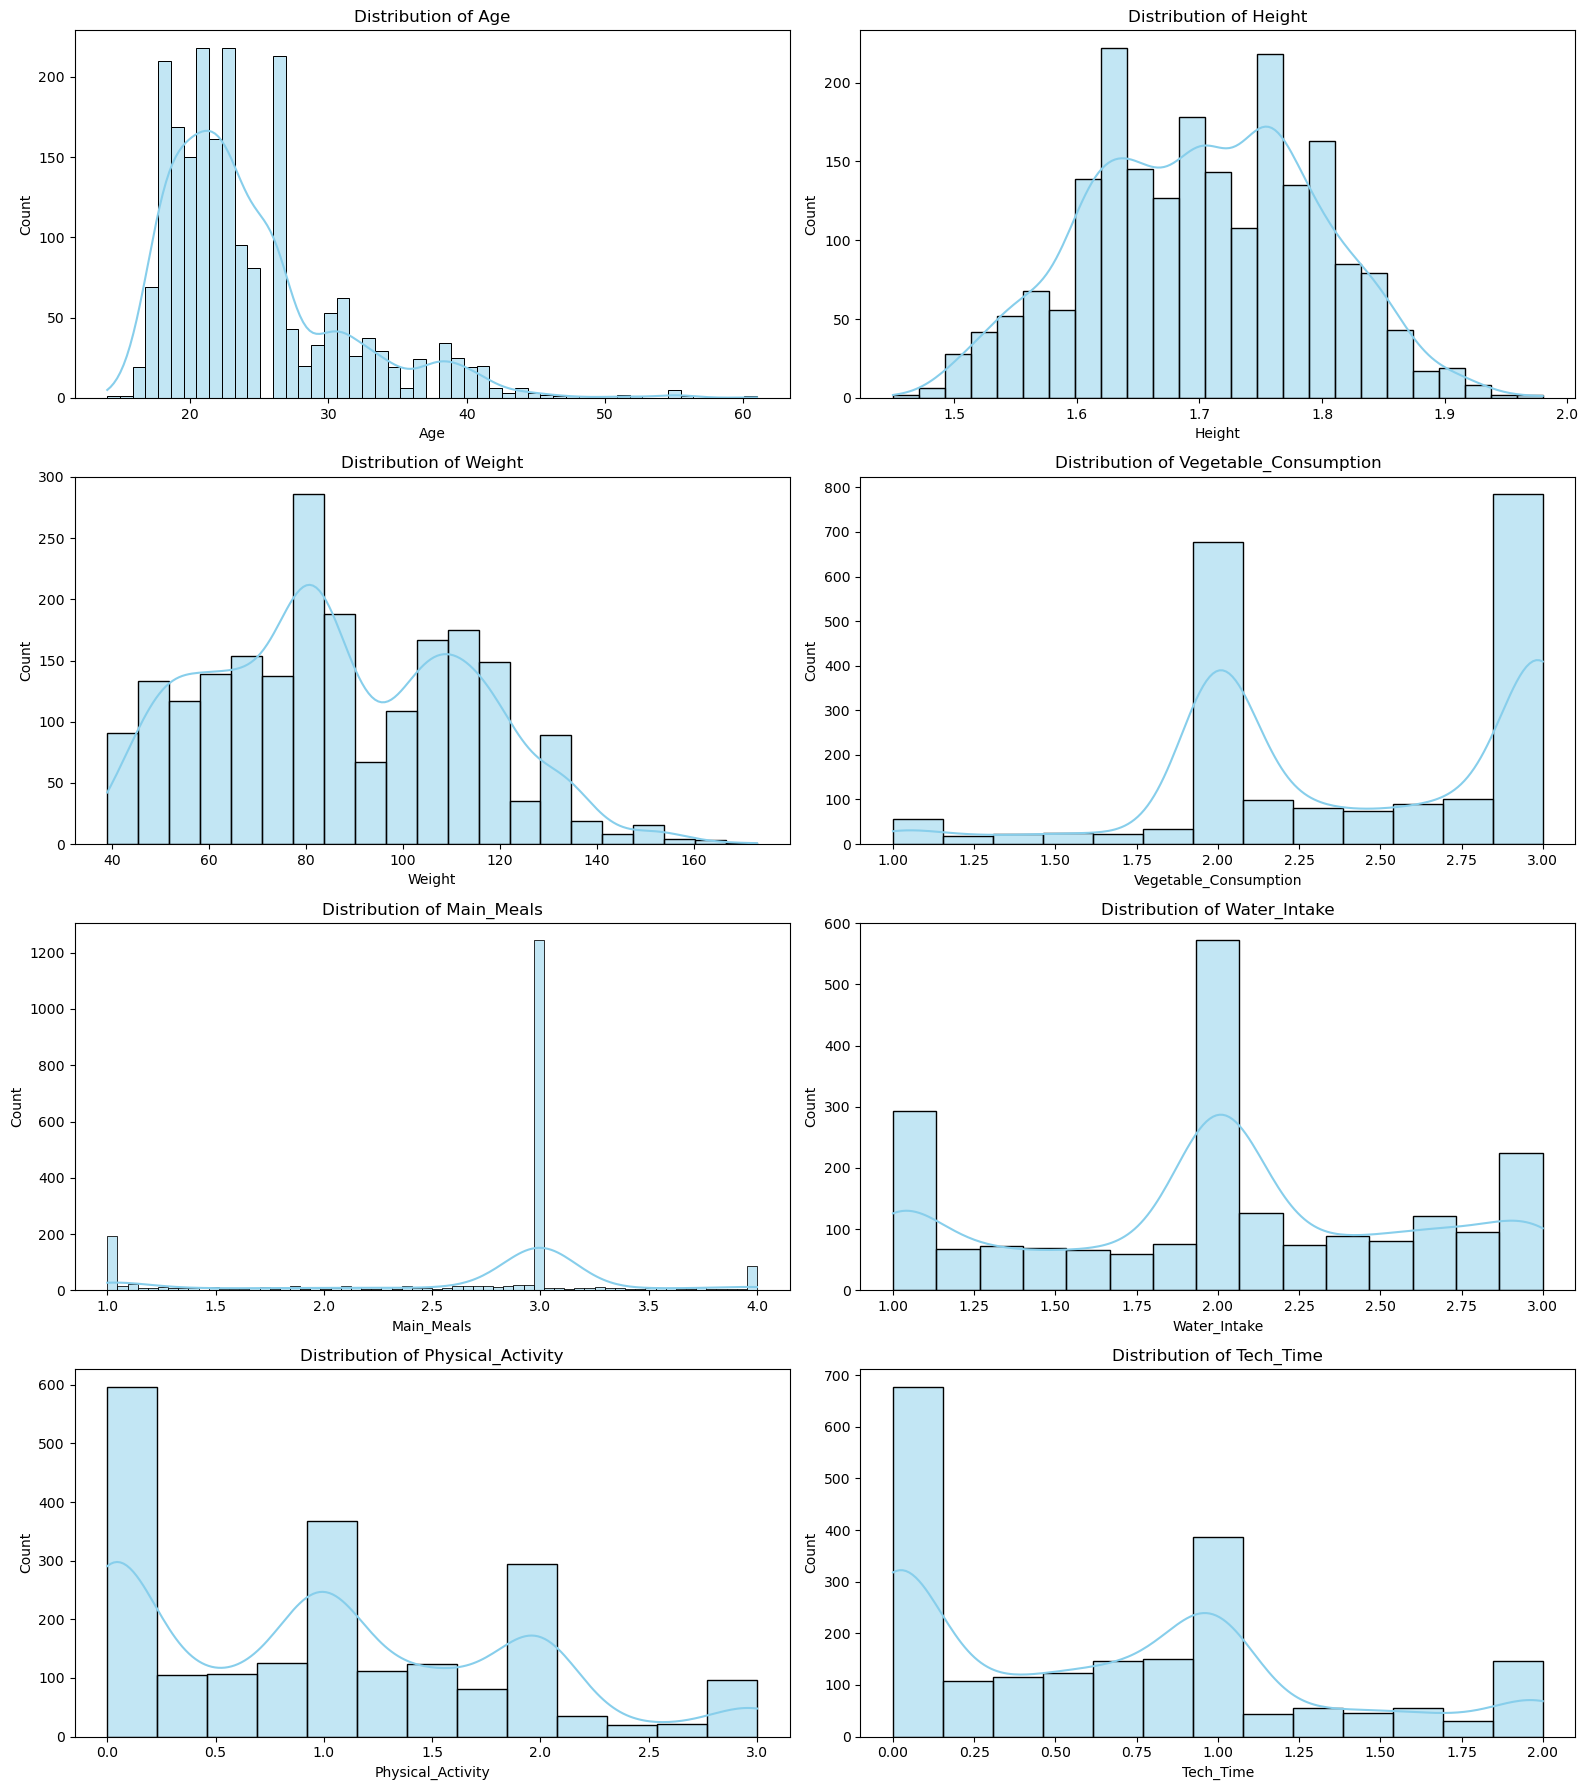

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### Statistical Summary

| Feature                    | Mean  | Std Dev | Min  | Max  | Notes                                 |
|----------------------------|-------|---------|------|------|----------------------------------------|
| Age                        | 24.3  | 6.36    | 14   | 61   | Mostly young adults                    |
| Height (m)                 | 1.70  | 0.09    | 1.45 | 1.98 | Reasonable human height range          |
| Weight (kg)                | 86.6  | 26.2    | 39   | 173  | Max values indicates obesity    |
| NCP (Meals/day)            | 2.69  | 0.78    | 1    | 4    | Mostly around 3 meals/day              |
| CH2O (Water intake/day)    | 2.01  | 0.61    | 1    | 3    | Mostly 2 liters/day range              |
| FAF (Physical activity)    | 1.01  | 0.85    | 0    | 3    | Many report low or no activity         |


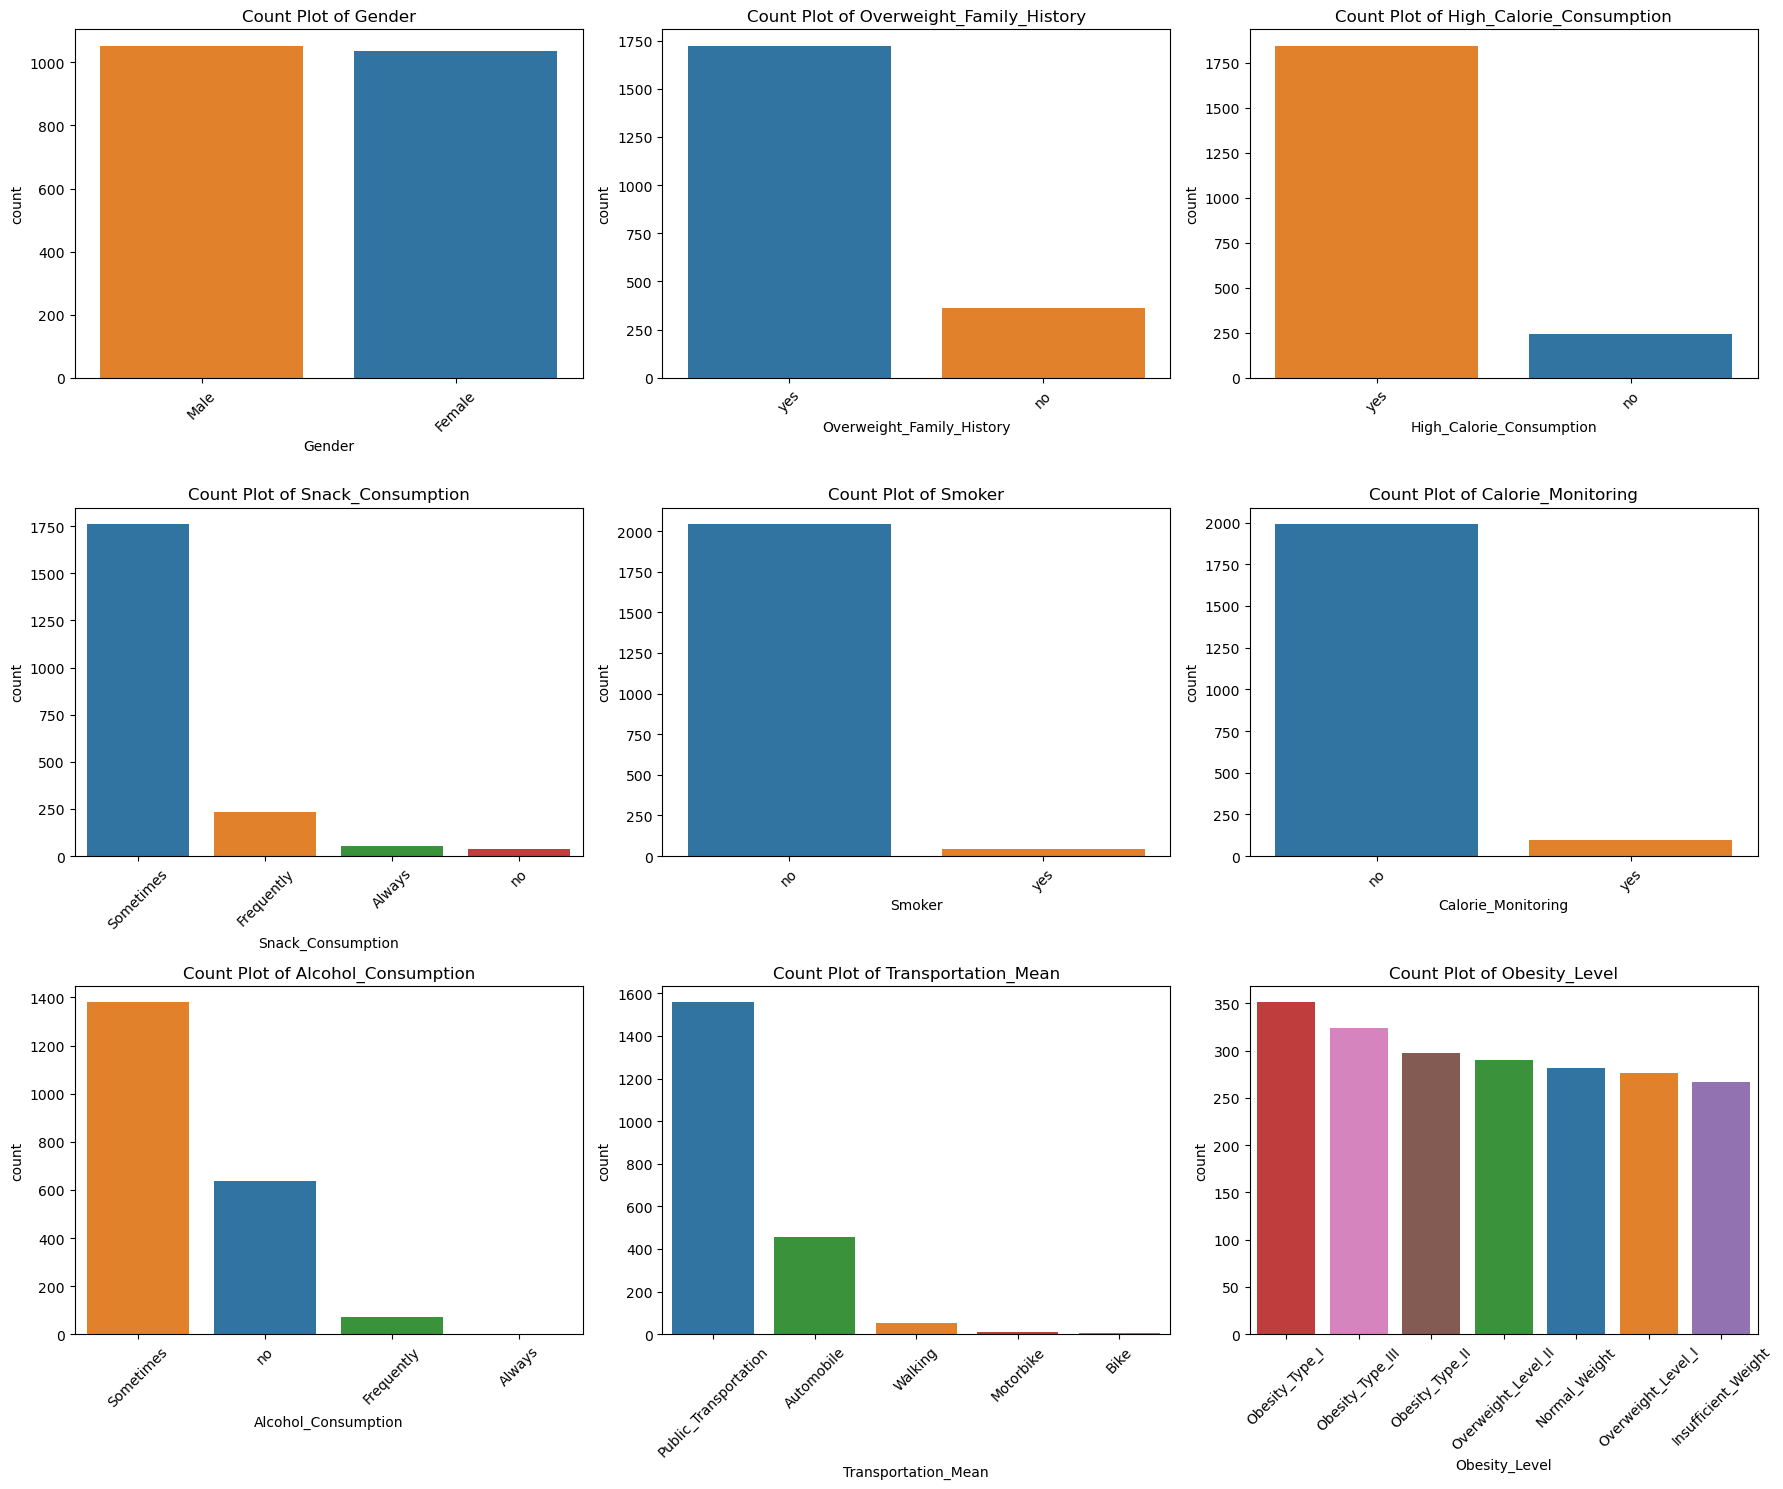

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue=col, order=df[col].value_counts().index)
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

### Insights from Categorical Variables

- **Gender**: Balanced between males and females.
- **Family History of Overweight**: Most individuals do have a family history.
- **FAVC (High-calorie food consumption)**: Predominantly "yes", indicating common unhealthy eating habits.
- **CAEC (Eating between meals)**: "Sometimes" is the most frequent.
- **SMOKE**: Most respondents do not smoke.
- **SCC (Caloric content tracking)**: Mostly "no", indicating low diet awareness.
- **CALC (Alcohol consumption)**: "Sometimes" is the most common.
- **MTRANS (Transport mode)**: Dominated by public transportation, followed by walking.
- **NObeyesdad (Obesity classification)**: Balanced spread, not skewed toward one class.


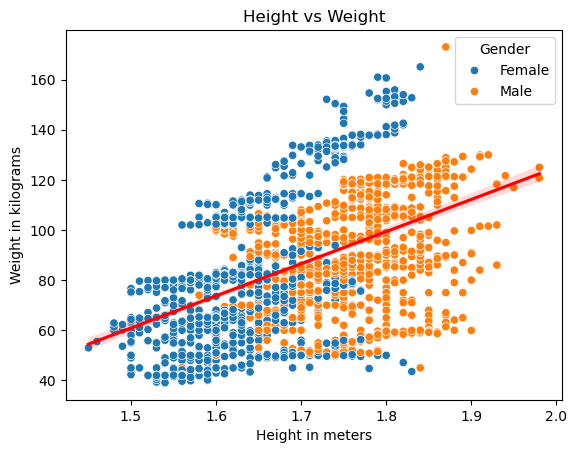

In [12]:
sns.scatterplot(x="Height", y="Weight", hue="Gender", data=df)
sns.regplot(x=df["Height"], y=df["Weight"], scatter=False, color="red")
plt.title("Height vs Weight")
plt.xlabel("Height in meters")
plt.ylabel("Weight in kilograms")
plt.show()

In [13]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)
numerical_columns = df.select_dtypes(include=["number"]).columns

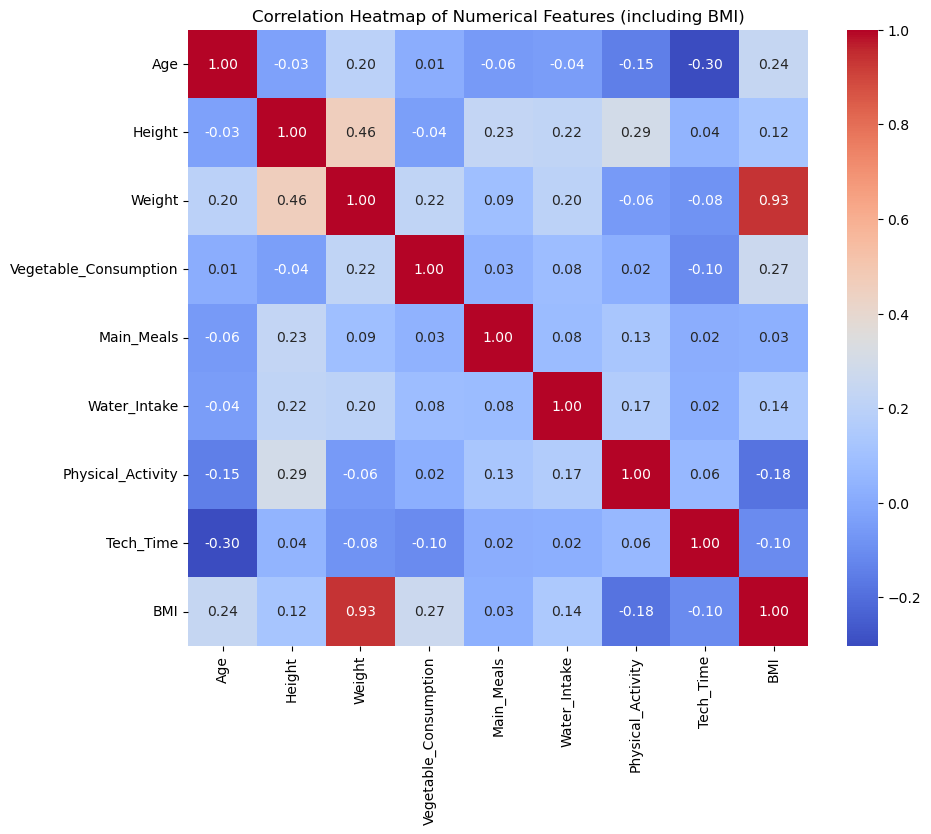

In [14]:
corr = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features (including BMI)")
plt.show()

In [15]:
correlations_with_bmi = corr["BMI"].sort_values(ascending=False)
correlations_with_bmi

BMI                      1.000000
Weight                   0.934242
Vegetable_Consumption    0.265395
Age                      0.241685
Water_Intake             0.143935
Height                   0.122835
Main_Meals               0.027889
Tech_Time               -0.104903
Physical_Activity       -0.183274
Name: BMI, dtype: float64

C:\Users\marwa\AppData\Local\Temp\ipykernel_18376\1687913100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Obesity_Level", y="BMI", palette="Set2")


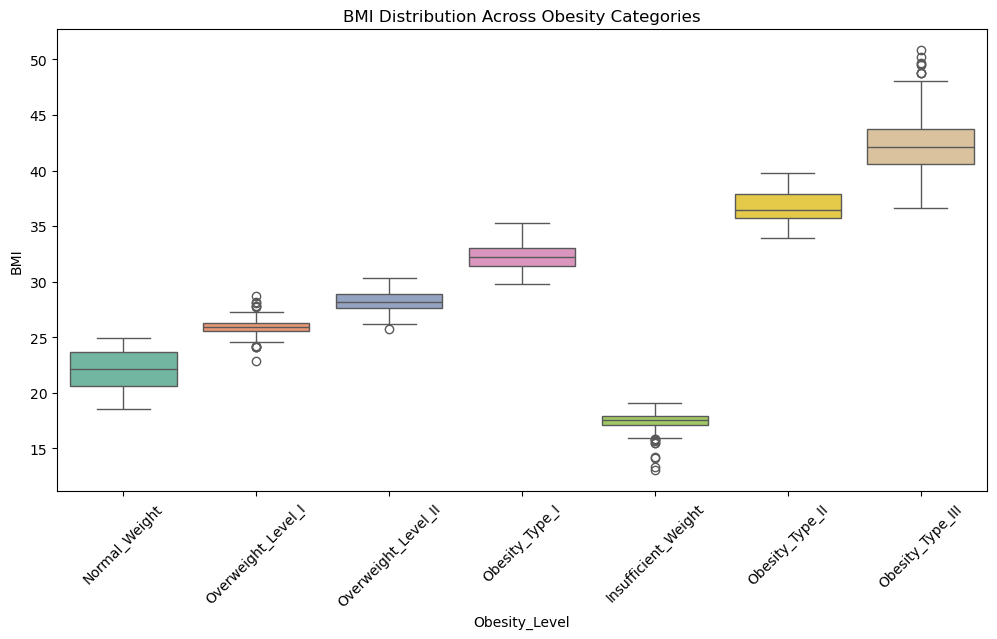

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Obesity_Level", y="BMI", palette="Set2")
plt.xticks(rotation=45)
plt.title("BMI Distribution Across Obesity Categories")
plt.show()

BMI values are in the expected ranges for each category

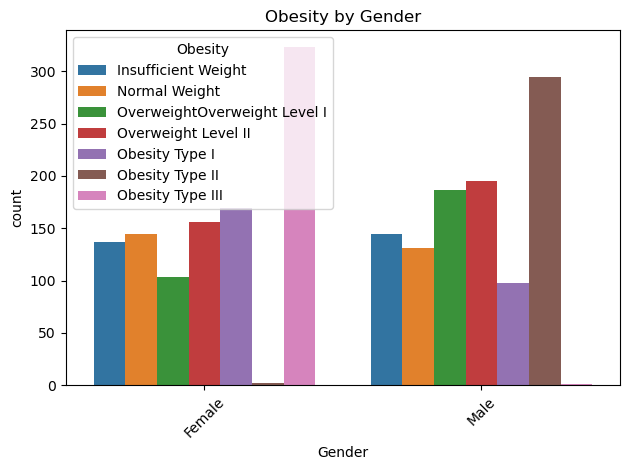

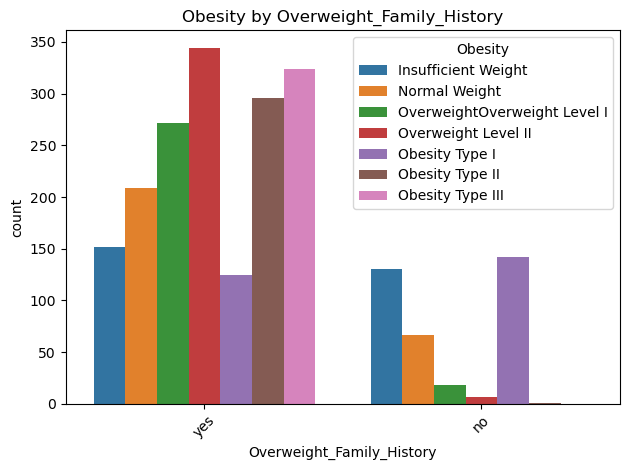

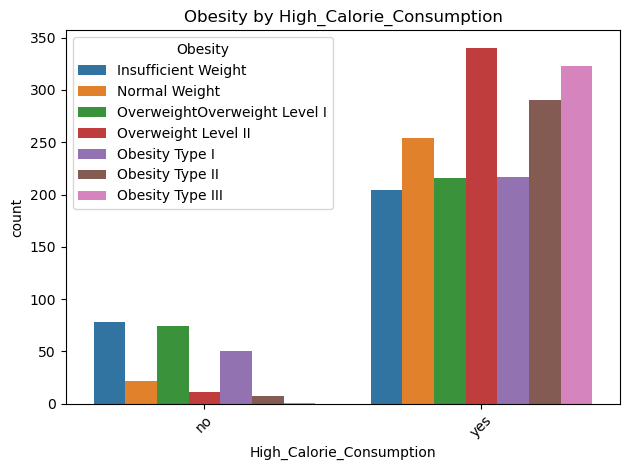

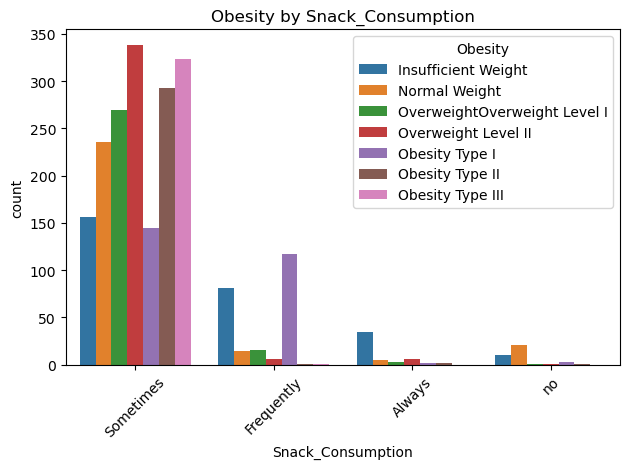

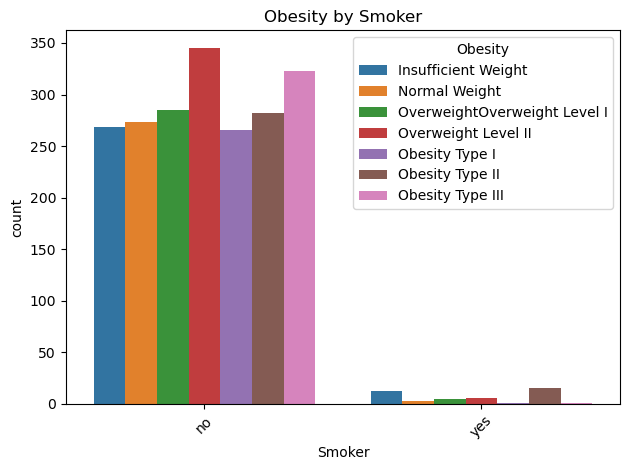

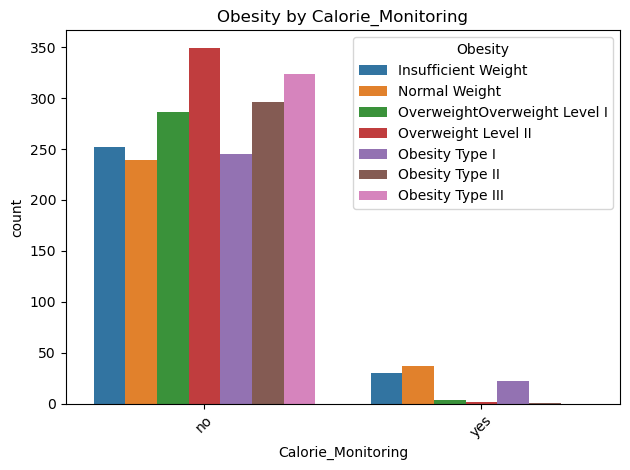

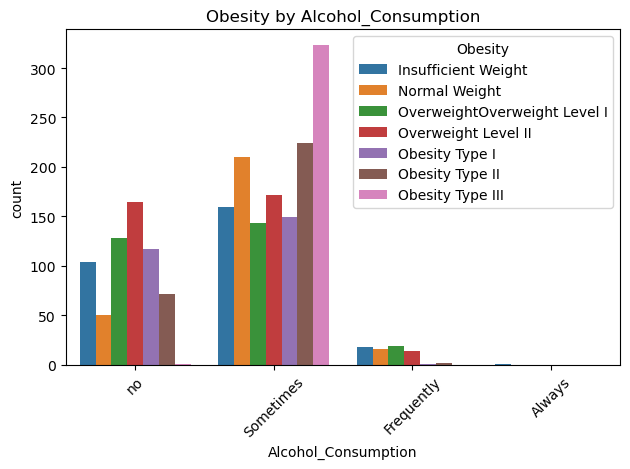

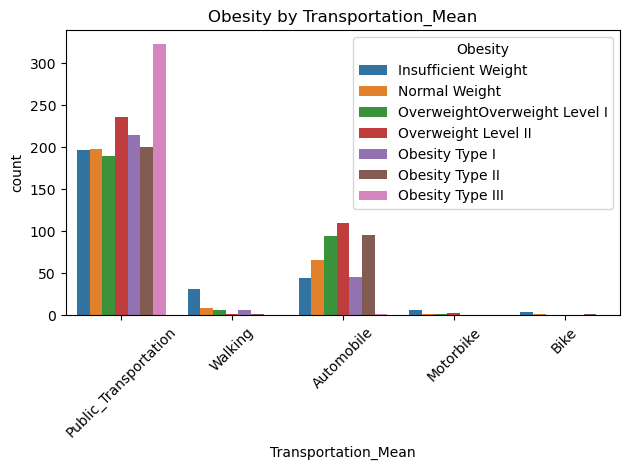

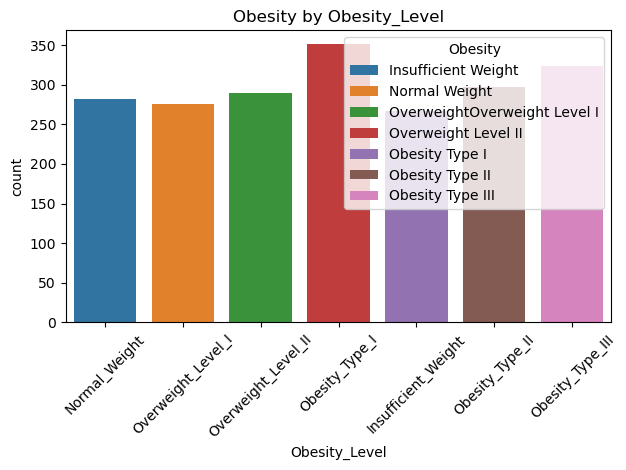

In [18]:
for col in categorical_columns:
    sns.countplot(x=col, hue='Obesity_Level', data=df)
    plt.title(f"Obesity by {col}")
    plt.legend(title='Obesity', labels=['Insufficient Weight', 'Normal Weight','OverweightOverweight Level I','Overweight Level II' ,'Obesity Type I', 'Obesity Type II', 'Obesity Type III'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [94]:
#Implementing ANOVA to check if BMI is significantly different across obesity categories
# Library for ANOVA analysis
from scipy.stats import f_oneway

# Perform ANOVA
anova_results = f_oneway(*(df[df["Obesity_Level"] == category]["BMI"] for category in df["Obesity_Level"].unique()))

# Display the results
print("ANOVA F-statistic:", anova_results.statistic)
print("ANOVA p-value:", anova_results.pvalue)

# Interpretation
if anova_results.pvalue < 0.05:
    print("The differences in BMI across the obesity categories are statistically significant.")
else:
    print("The differences in BMI across the obesity categories are not statistically significant.")

ANOVA F-statistic: 9883.990223812143
ANOVA p-value: 0.0
The differences in BMI across the obesity categories are statistically significant.


In [19]:
df_encoded = df.copy()

In [21]:
df['Obesity_Level'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [23]:
encoder = OrdinalEncoder(categories=[['Insufficient_Weight', 'Normal_Weight','Overweight_Level_I','Overweight_Level_II' ,'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']])
df_encoded['Obesity_Level'] = encoder.fit_transform(df[['Obesity_Level']])

In [24]:
df_encoded['Obesity_Level'].unique()

array([1., 2., 3., 4., 0., 5., 6.])

In [25]:
encoded_categorical_columns = df_encoded.select_dtypes(include=['object']).columns
encoded_categorical_columns

Index(['Gender', 'Overweight_Family_History', 'High_Calorie_Consumption',
       'Snack_Consumption', 'Smoker', 'Calorie_Monitoring',
       'Alcohol_Consumption', 'Transportation_Mean'],
      dtype='object')

In [26]:
label_encoder = LabelEncoder()
df_encoded[categorical_columns] = df_encoded[categorical_columns].apply(label_encoder.fit_transform)
df_encoded[categorical_columns].head()

,Gender,Overweight_Family_History,High_Calorie_Consumption,Snack_Consumption,Smoker,Calorie_Monitoring,Alcohol_Consumption,Transportation_Mean,Obesity_Level
0,0,1,0,2,0,0,3,3,1
1,0,1,0,2,1,1,2,3,1
2,1,1,0,2,0,0,1,3,1
3,1,0,0,2,0,0,1,4,2
4,1,0,0,2,0,0,2,3,3


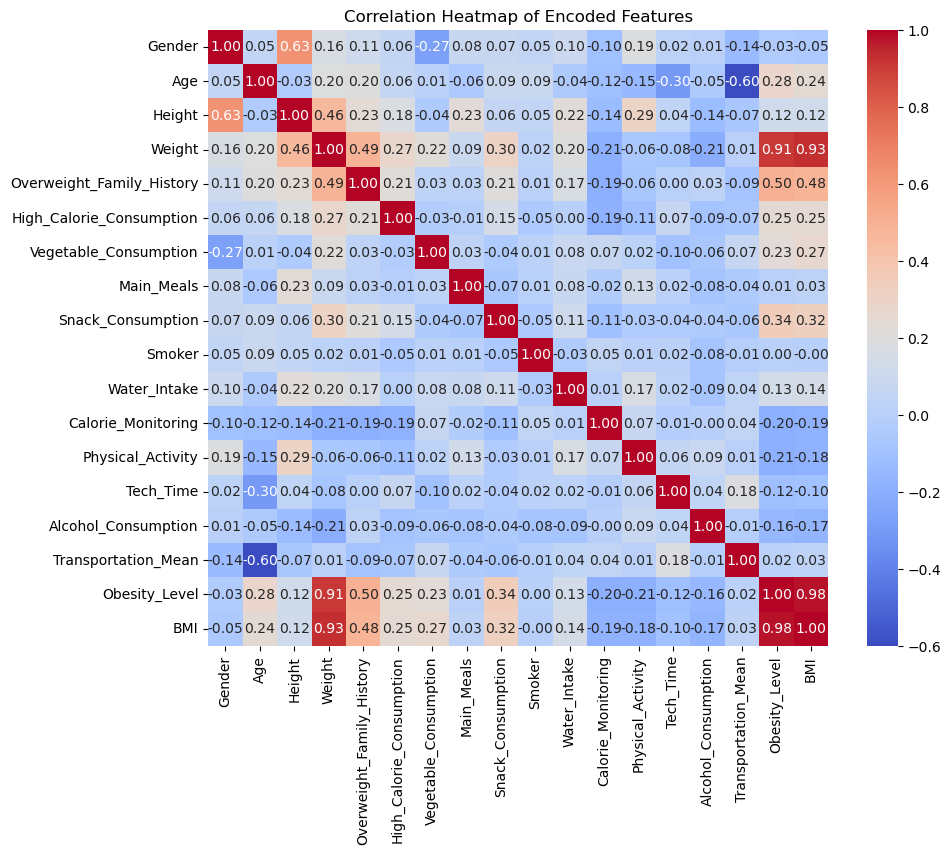

In [27]:
correlation_with_target = df_encoded.corr()['Obesity_Level'].sort_values(ascending=False)
plt.figure(figsize=(10, 8)) 
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Encoded Features")
plt.show()


In [28]:
correlation_with_target 

Obesity_Level                1.000000
BMI                          0.977735
Weight                       0.912452
Overweight_Family_History    0.503374
Snack_Consumption            0.342205
Age                          0.280412
High_Calorie_Consumption     0.249927
Vegetable_Consumption        0.228736
Water_Intake                 0.134140
Height                       0.123923
Transportation_Mean          0.016206
Main_Meals                   0.010958
Smoker                       0.001984
Gender                      -0.031920
Tech_Time                   -0.115332
Alcohol_Consumption         -0.155300
Calorie_Monitoring          -0.197819
Physical_Activity           -0.205940
Name: Obesity_Level, dtype: float64

**Features to Exclude** : SMOKE, SCC, Gender, NCP, MTRANS
- Exclude weight and height since we created BMI